# K means

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
# exercise 10.1.1
from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from toolbox_02450 import clusterplot
from sklearn.cluster import k_means

# Load Matlab data file and extract variables of interest
mat_data = loadmat('./data/synth1.mat')# can change to synth2,synth3,synth4
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

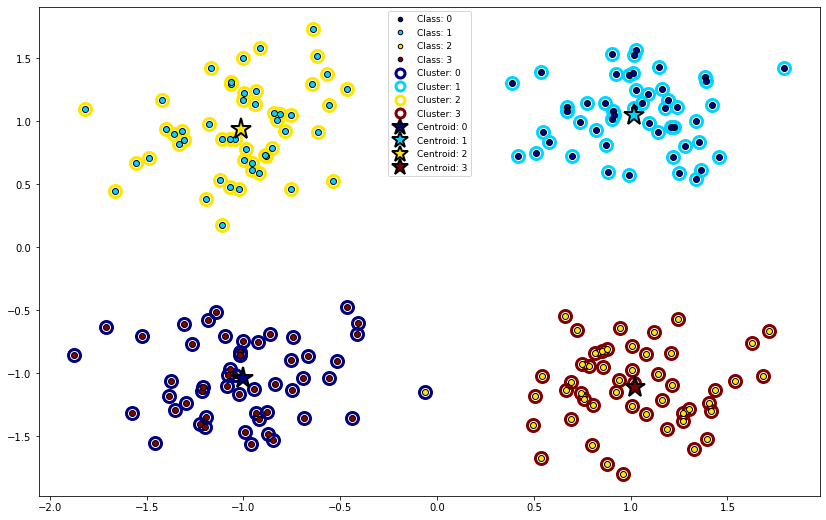

Ran Exercise 10.1.1


In [30]:
# Number of clusters:
K = 4

# K-means clustering:
# centroids, cls, inertia = k_means(X,K)
centroids, cls, inertia,best_n_iter= k_means(X,K,n_init=1,return_n_iter=True)
    
# Plot results:
figure(figsize=(14,9))
clusterplot(X, cls, centroids, y)
show()

print('Ran Exercise 10.1.1')

In [21]:
help(k_means)

Help on function k_means in module sklearn.cluster.k_means_:

k_means(X, n_clusters, sample_weight=None, init='k-means++', precompute_distances='auto', n_init=10, max_iter=300, verbose=False, tol=0.0001, random_state=None, copy_x=True, n_jobs=None, algorithm='auto', return_n_iter=False)
    K-means clustering algorithm.
    
    Read more in the :ref:`User Guide <k_means>`.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        The observations to cluster. It must be noted that the data
        will be converted to C ordering, which will cause a memory copy
        if the given data is not C-contiguous.
    
    n_clusters : int
        The number of clusters to form as well as the number of
        centroids to generate.
    
    sample_weight : array-like, shape (n_samples,), optional
        The weights for each observation in X. If None, all observations
        are assigned equal weight (default: None)
    
    init : {'k-mean

In [4]:
help(clusterplot)

Help on function clusterplot in module toolbox_02450:

clusterplot(X, clusterid, centroids='None', y='None', covars='None')
    CLUSTERPLOT Plots a clustering of a data set as well as the true class
    labels. If data is more than 2-dimensional it should be first projected
    onto the first two principal components. Data objects are plotted as a dot
    with a circle around. The color of the dot indicates the true class,
    and the cicle indicates the cluster index. Optionally, the centroids are
    plotted as filled-star markers, and ellipsoids corresponding to covariance
    matrices (e.g. for gaussian mixture models).
    
    Usage:
    clusterplot(X, clusterid)
    clusterplot(X, clusterid, centroids=c_matrix, y=y_matrix)
    clusterplot(X, clusterid, centroids=c_matrix, y=y_matrix, covars=c_tensor)
    
    Input:
    X           N-by-M data matrix (N data objects with M attributes)
    clusterid   N-by-1 vector of cluster indices
    centroids   K-by-M matrix of cluster centr

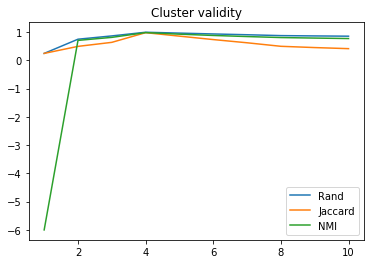

Ran Exercise 10.1.3


In [31]:
from toolbox_02450 import clusterval
from matplotlib.pyplot import figure, title, plot, ylim, legend, show
# You can find many additional cluster validity measures in sklearn.metrics.cluster package

# Maximum number of clusters:
K = 10

# Allocate variables:
Rand = np.zeros((K,))
Jaccard = np.zeros((K,))
NMI = np.zeros((K,))

for k in range(K):
    # run K-means clustering:
    #cls = Pycluster.kcluster(X,k+1)[0]
    centroids, cls, inertia = k_means(X,k+1)
    # compute cluster validities:
    Rand[k], Jaccard[k], NMI[k] = clusterval(y,cls)    
        
# Plot results:

figure(1)
title('Cluster validity')
plot(np.arange(K)+1, Rand)
plot(np.arange(K)+1, Jaccard)
plot(np.arange(K)+1, NMI)
legend(['Rand', 'Jaccard', 'NMI'], loc=4)
show()

print('Ran Exercise 10.1.3')

# Hierarchical

In [1]:
# exercise 10.1.1
from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from toolbox_02450 import clusterplot
from sklearn.cluster import k_means

# Load Matlab data file and extract variables of interest
mat_data = loadmat('./data/synth1.mat')# can change to synth2,synth3,synth4
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

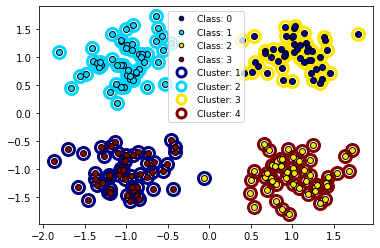

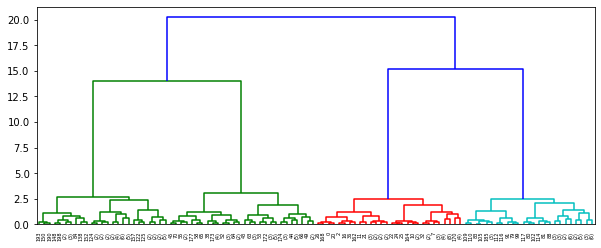

Ran Exercise 10.2.1


In [50]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Perform hierarchical/agglomerative clustering on data matrix
Method = 'ward' #can change different distance measure to different dataset
Metric = 'euclidean'

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(Z, criterion='maxclust', t=Maxclust)
figure(1)
clusterplot(X, cls.reshape(cls.shape[0],1), y=y)

# Display dendrogram
max_display_levels=6
figure(2,figsize=(10,4))
dendrogram(Z, truncate_mode='level', p=max_display_levels)

show()

print('Ran Exercise 10.2.1')

In [45]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

## data compression of k-means

In [37]:
# exercise 10_1_5
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import k_means


# Load Matlab data file and extract variables of interest
# mat_data = loadmat('./data/wildfaces.mat')
mat_data = loadmat('./data/digits.mat') #<-- uncomment this for using the digits dataset 

X = mat_data['X']
N, M = X.shape
# Image resolution and number of colors
x = 16 #<-- change this for using the digits dataset
y = 16 #<-- change this for using the digits dataset
c = 1 #<-- change this for using the digits dataset

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 776046.2084043851
start iteration
done sorting
end inner loop
Iteration 1, inertia 745127.4016880192
start iteration
done sorting
end inner loop
Iteration 2, inertia 736245.6049587725
start iteration
done sorting
end inner loop
Iteration 3, inertia 731991.5609565416
start iteration
done sorting
end inner loop
Iteration 4, inertia 728618.6905289699
start iteration
done sorting
end inner loop
Iteration 5, inertia 725984.5474593744
start iteration
done sorting
end inner loop
Iteration 6, inertia 724329.2071087356
start iteration
done sorting
end inner loop
Iteration 7, inertia 723387.4775745672
start iteration
done sorting
end inner loop
Iteration 8, inertia 722903.9198403837
start iteration
done sorting
end inner loop
Iteration 9, inertia 722532.6475231282
start iteration
done sorting
end inner loop
Iteration 10, inertia 722208.8036267511
start iteration
done sorting
end inner loop
Iteration 11, iner

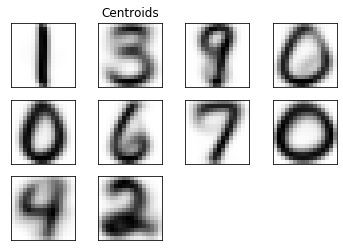

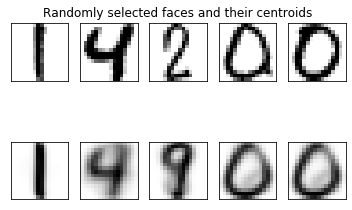

Ran Exercise 10.1.5


In [38]:

# Number of clusters:
K = 10

# Number of repetitions with different initial centroid seeds
S = 1

# Run k-means clustering:
centroids, cls, inertia = k_means(X, K, verbose=True, max_iter=100, n_init=S)


# Plot results:

# Plot centroids
plt.figure(1)
n1 = np.ceil(np.sqrt(K/2)); n2 = np.ceil(np.float(K)/n1)

#For black and white, cmap=plt.cm.binary, else default
cmap = plt.cm.binary if c==1 else None 

for k in range(K):
    plt.subplot(n1,n2,k+1)
    # Reshape centroids to fit resolution and colors
    img = np.reshape(centroids[k,:],(c,x,y)).T
    if c == 1: # if color is single-color/gray scale
        # Squeeze out singleton dimension
        # and flip the image (cancel out previos transpose)
        img = np.squeeze(img).T
    plt.imshow(img,interpolation='None', cmap=cmap)
    plt.xticks([]); plt.yticks([])
    if k==np.floor((n2-1)/2): plt.title('Centroids')

# Plot few randomly selected faces and their nearest centroids    
L = 5       # number of images to plot
j = np.random.randint(0, N, L)
plt.figure(2)
for l in range(L):
    plt.subplot(2,L,l+1)
    img = np.resize(X[j[l],:],(c,x,y)).T
    if c == 1:
        img = np.squeeze(img).T
    plt.imshow(img,interpolation='None', cmap=cmap)
    plt.xticks([]); plt.yticks([])
    if l==np.floor((L-1)/2): plt.title('Randomly selected faces and their centroids')
    plt.subplot(2,L,L+l+1)
    img = np.resize(centroids[cls[j[l]],:],(c,x,y)).T
    if c == 1:
        img = np.squeeze(img).T
    plt.imshow(img,interpolation='None', cmap=cmap)
    plt.xticks([]); plt.yticks([])

plt.show()

print('Ran Exercise 10.1.5')